# Measures of Topic Coherence for NMF feature space

In [1]:
import os
import sys
parent_dr = os.path.split(os.getcwd())[0]
if parent_dr not in sys.path:
    sys.path.append(parent_dr)

In [2]:
from sklearn.decomposition import NMF
from core.data.training_data import *
from core.matrix.nmf_decompositions import compute_nmf, generate_topics_from_NMF

In [3]:
# path to serialized training data
file_name = "tokenized_arxiv_subset_15540.pkl"
full_path = os.path.join(parent_dr, "core", "resources", file_name)

# wrapper for training data and computed matrices
data_obj = TrainingData(full_path)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [5]:
# Checking train split
assert len(data_obj.train_df)/len(data_obj.data_df) == 0.8

# Show Coherence for multiple NMF "models"

## A model for k = 7 (known number of categories)
- compute factorization
- generate topics from H matrix
- convert topics df to list of list
- compute coherence on topics list

In [6]:
model_7, W_7, H_7 = compute_nmf(k=7, A=data_obj.tfidf_train_matrix)

In [7]:
topic_terms_7 = generate_topics_from_NMF(model_7.components_,
                                         data_obj.index_to_word,
                                         top_n_words = 15)

In [8]:
topic_terms_7

,Topic,Terms
0,0,"[problem, algorithm, search, solution, constraint, solve, method, heuristic, planning, approach, optimization, optimal, plan, time, instance]"
1,1,"[number, study, proceeding, conference, time, result, hold, covid, bind, et, al, frac, word, dataset, set]"
2,2,"[datum, system, technology, student, ai, research, user, information, service, social, study, use, development, paper, design]"
3,3,"[network, brain, neuron, model, neural, spike, activity, dynamic, stimulus, input, connectivity, functional, cell, neuronal, synaptic]"
4,4,"[agent, game, learn, learning, environment, reinforcement, action, task, human, reward, policy, model, state, rl, ai]"
5,5,"[graph, vertex, edge, free, tree, class, problem, polynomial, coloring, set, color, np, bipartite, complete, chordal]"
6,6,"[belief, logic, probability, knowledge, rule, model, theory, reasoning, set, inference, probabilistic, fuzzy, semantic, base, decision]"


In [9]:
topics_7 = topic_terms_7['Terms'].tolist()

In [10]:
coherence_7 = data_obj.compute_coherence(topics_7)
print("Coherehence for NMK k=7:", coherence_7)

Coherehence for NMK k=7: 0.6110867524097108


## A model for k = 2299 (from screeplot of singular values of original tfidf matrix)
- read in serialized model components
- generate topics from H matrix
- convert topics df to list of list
- compute coherence on topics list

In [11]:
# read in pickled model component
component_file_name = "H_2299.pkl"
full_path_component = os.path.join(parent_dr, "core", "resources", component_file_name)
H_2299 = np.load(full_path_component, allow_pickle=True)

In [12]:
topic_terms_2299 = generate_topics_from_NMF(H_2299,
                                         data_obj.index_to_word,
                                         top_n_words = 15)

In [13]:
topic_terms_2299.tail(n=15)

,Topic,Terms
2284,2284,"[speech, intelligibility, speak, infant, clp, hour, rakugo, prosody, clean, divergence, fog, native, nsa, covert, tts]"
2285,2285,"[poisson, pdf, interspike, leaky, exactly, stimulate, impulse, passage, glm, renewal, binding, mid, cl, lif, weber]"
2286,2286,"[interface, gui, hoffman, usability, biopolitic, menu, rlcard, aba, fillin, proxdd, regularisation, gelisp, forcing, handwriting, netlogo]"
2287,2287,"[novel, molecule, tiva, reliably, percept, npls, likeability, literary, anesthesia, imperfection, afford, evaporation, drama, fmc, volatile]"
2288,2288,"[pandemic, covid, camera, covidnumber, corona, mec, qureshi, milan, deploy, senior, socio, alleviate, strain, march, reporter]"
2289,2289,"[technology, societal, advancement, metaverse, tnumber, rise, idt, holographic, raise, pervasive, paas, instructional, agriculture, reshape, prevail]"
2290,2290,"[time, ctbns, logn, running, iterant, kauffman, primordial, absorb, flavor, teleport, hqr, rissanen, prod, rendezvous, bearer]"
2291,2291,"[unified, episode, episodic, counting, unify, duality, correctness, intermittent, conception, pal, atlas, deepc, worth, fibrillation, recount]"
2292,2292,"[activity, ndsan, dialect, playful, modulate, dle, su, recognise, sta, walker, surveillance, aoa, aon, everyday, inertial]"
2293,2293,"[collect, gather, marketer, meme, orienteering, misogynistic, liftupp, naturalistic, researchkit, viola, cbl, haptic, village, crowdworker, algs]"


In [14]:
topics_2299 = topic_terms_2299['Terms'].tolist()

In [15]:
# this will be slow, don't run unless necessary
# this is commented out to prevent it from being auto-run
# coherence_2299 = data_obj.compute_coherence(topics_2299)
print("Coherehence for NMK k=2299:", coherence_2299)

Coherehence for NMK k=2299: 0.4358720182045553


Coherehence for NMK k=2299: 0.4358720182045553

## Evalaute NMF by coherence for different values for k

In [25]:
coherence_k_list = []
for k in range(5, 105, 5):
    model_k, W_k, H_k = compute_nmf(k=k, A=data_obj.tfidf_train_matrix)
    topic_terms_k = generate_topics_from_NMF(model_k.components_,
                                         data_obj.index_to_word,
                                         top_n_words = 10)
    topics_k = topic_terms_k['Terms'].tolist()
    coherence_k = data_obj.compute_coherence(topics_k)
    print(f"Coherence for k={k}: {coherence_k}")
    coherence_k_list.append([k, coherence_k])
coherence_values_df = pd.DataFrame(coherence_k_list, columns=["k", "Coherence c_v"])

Coherence for k=5: 0.5994031342453037
Coherence for k=10: 0.6227618172152884
Coherence for k=15: 0.6515373981532407
Coherence for k=20: 0.6321655425990665
Coherence for k=25: 0.6242386269296325
Coherence for k=30: 0.6099075836438433
Coherence for k=35: 0.6195758084283703
Coherence for k=40: 0.590120483740036
Coherence for k=45: 0.5847999848715
Coherence for k=50: 0.5810316476463224
Coherence for k=55: 0.5884311853980914
Coherence for k=60: 0.5860333821174598
Coherence for k=65: 0.590759261335552
Coherence for k=70: 0.5808730212020072
Coherence for k=75: 0.5799048917411668
Coherence for k=80: 0.5700937151614535
Coherence for k=85: 0.5587240494309228
Coherence for k=90: 0.5668255707856921
Coherence for k=95: 0.5554484800664976
Coherence for k=100: 0.5545652721646599


In [26]:
coherence_values_df

,k,Coherence c_v
0,5,0.599403
1,10,0.622762
2,15,0.651537
3,20,0.632166
4,25,0.624239
5,30,0.609908
6,35,0.619576
7,40,0.590120
8,45,0.584800
9,50,0.581032


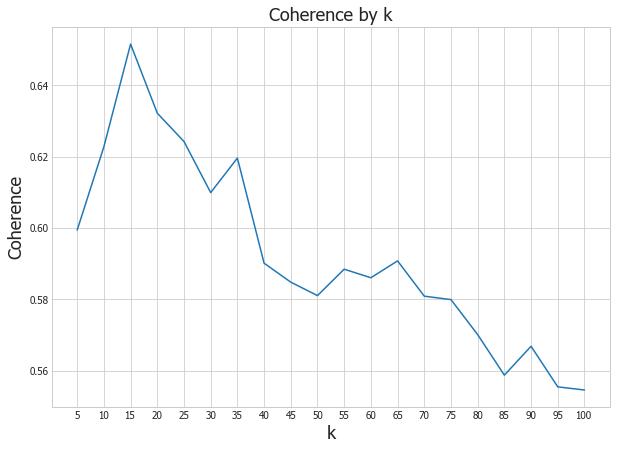

In [44]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,7)
plt.plot(coherence_values_df["k"], coherence_values_df["Coherence c_v"])
plt.title("Coherence by k", fontsize=18)
plt.xlabel("k", fontsize=18)
plt.xticks(coherence_values_df["k"])
plt.ylabel("Coherence", fontsize=18)
plt.show()

## A model for k = 15 (best k for coherence)
- compute factorization
- generate topics from H matrix
- convert topics df to list of list
- compute coherence on topics list

In [46]:
model_15, W_15, H_15 = compute_nmf(k=15, A=data_obj.tfidf_train_matrix)

In [47]:
topic_terms_15 = generate_topics_from_NMF(model_15.components_,
                                         data_obj.index_to_word,
                                         top_n_words = 10)

In [48]:
topic_terms_15

,Topic,Terms
0,0,"[algorithm, search, heuristic, method, propose, performance, tree, time, space, base]"
1,1,"[number, proceeding, study, conference, hold, time, covid, result, bind, et]"
2,2,"[datum, user, technology, service, information, research, social, system, health, privacy]"
3,3,"[network, brain, neuron, neural, spike, activity, dynamic, stimulus, connectivity, functional]"
4,4,"[agent, learn, environment, reinforcement, reward, learning, policy, task, rl, human]"
5,5,"[graph, vertex, edge, free, tree, class, coloring, polynomial, color, bipartite]"
6,6,"[knowledge, logic, rule, semantic, ontology, fuzzy, system, reasoning, set, base]"
7,7,"[ai, intelligence, system, artificial, human, machine, ethical, research, ethic, explanation]"
8,8,"[student, learn, learning, course, education, university, teacher, educational, skill, computer]"
9,9,"[belief, probability, network, inference, probabilistic, bayesian, distribution, conditional, theory, function]"
